In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-regression/Social_Network_Ads.csv


In [51]:
df= pd.read_csv('../input/logistic-regression/Social_Network_Ads.csv')

In [52]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [53]:
# Evaluation Metrics
from sklearn.model_selection import train_test_split # for splitting the dataset into training and testing
from sklearn.metrics import confusion_matrix # for plotting the confusion matrix
from sklearn.metrics import classification_report # for getting the f1 score, precision, recall etc
from sklearn import metrics # for getting the overall accuracy of the ML model

In [54]:
from sklearn.linear_model import LogisticRegression # ML model

In [55]:
import matplotlib.pyplot as plt  # used for plotting graphs
import seaborn as sns

In [56]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [57]:
df['Gender']=df['Gender'].map({'Male': 0.0, 'Female':1.0})

In [58]:
df['Purchased']=df['Purchased'].map({0: 0.0, 1:1.0})

In [59]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0.0,19,19000,0.0
1,15810944,0.0,35,20000,0.0
2,15668575,1.0,26,43000,0.0
3,15603246,1.0,27,57000,0.0
4,15804002,0.0,19,76000,0.0
...,...,...,...,...,...
395,15691863,1.0,46,41000,1.0
396,15706071,0.0,51,23000,1.0
397,15654296,1.0,50,20000,1.0
398,15755018,0.0,36,33000,0.0


In [60]:
from sklearn.preprocessing import Normalizer

In [61]:
age= df['Age']
age= age.to_numpy()

norm= Normalizer().fit([age])
age= norm.transform([age])

age= np.squeeze(age)
df['Age']= pd.Series(age)

In [62]:
es= df['EstimatedSalary']
es= es.to_numpy()

norm= Normalizer().fit([es])
es= norm.transform([es])

es= np.squeeze(es)
df['EstimatedSalary']= pd.Series(es)

In [63]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0.0,0.024307,0.012240,0.0
1,15810944,0.0,0.044776,0.012885,0.0
2,15668575,1.0,0.033262,0.027702,0.0
3,15603246,1.0,0.034541,0.036721,0.0
4,15804002,0.0,0.024307,0.048961,0.0
...,...,...,...,...,...
395,15691863,1.0,0.058848,0.026413,1.0
396,15706071,0.0,0.065245,0.014817,1.0
397,15654296,1.0,0.063966,0.012885,1.0
398,15755018,0.0,0.046055,0.021259,0.0


In [64]:
dataset= df.values

X= dataset[:, 1:4]
Y = dataset[:, 4]

In [65]:
Y

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0.

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
# print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print("Training Input Size: ", X_train.shape)
print("Training Output Size: ", Y_train.shape)
print("Testing Input Size: ", X_test.shape)
print("Testing Output Size: ", Y_test.shape)

Training Input Size:  (280, 3)
Training Output Size:  (280,)
Testing Input Size:  (120, 3)
Testing Output Size:  (120,)


In [67]:
lr= LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [68]:
Y_pred= lr.predict(X_test)

In [69]:
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy: ", acc)

Accuracy:  0.6583333333333333


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.66      1.00      0.79        79
         1.0       0.00      0.00      0.00        41

    accuracy                           0.66       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.43      0.66      0.52       120



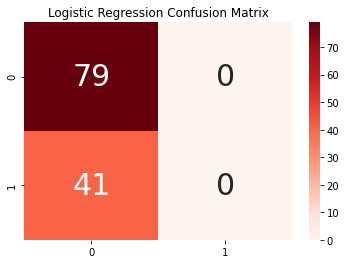

In [70]:
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Reds", ax = ax )
ax.set_title('Logistic Regression Confusion Matrix')
plt.show()
ax.figure.savefig("Logistic_Regression_Confusion_Matrix.png", dpi = 500)

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt= DecisionTreeClassifier()

In [73]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [74]:
Y_pred= dt.predict(X_test)

In [75]:
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy: ", acc)

Accuracy:  0.875


              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90        79
         1.0       0.81      0.83      0.82        41

    accuracy                           0.88       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.88      0.88      0.88       120



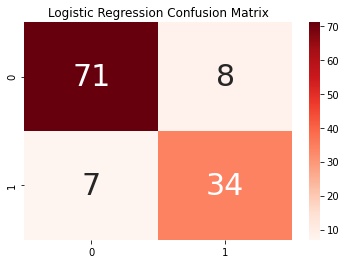

In [76]:
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Reds", ax = ax )
ax.set_title('Logistic Regression Confusion Matrix')
plt.show()
ax.figure.savefig("Logistic_Regression_Confusion_Matrix.png", dpi = 500)

In [77]:
from sklearn.cluster import KMeans

In [78]:
km= KMeans(n_clusters=2)

In [80]:
km.fit(X_train, Y_train)

KMeans(n_clusters=2)

In [81]:
Y_pred= km.predict(X_test)

In [82]:
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy: ", acc)

Accuracy:  0.5


              precision    recall  f1-score   support

         0.0       0.65      0.53      0.58        79
         1.0       0.33      0.44      0.37        41

    accuracy                           0.50       120
   macro avg       0.49      0.49      0.48       120
weighted avg       0.54      0.50      0.51       120



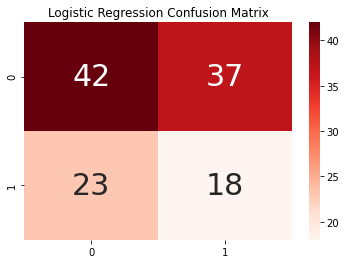

In [83]:
print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Reds", ax = ax )
ax.set_title('Logistic Regression Confusion Matrix')
plt.show()
ax.figure.savefig("Logistic_Regression_Confusion_Matrix.png", dpi = 500)

In [84]:
from sklearn.linear_model import BayesianRidge

In [85]:
br= BayesianRidge()
br.fit(X_train,Y_train)

BayesianRidge()

In [88]:
Y_pred= br.predict(X_test)

In [96]:
acc=metrics.accuracy_score(Y_test, Y_pred.round())
print("Accuracy: ", acc)

Accuracy:  0.875


In [97]:
print(classification_report(Y_test, Y_pred.round()))

cm = confusion_matrix(Y_test, Y_pred.round())

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Reds", ax = ax )
ax.set_title('Logistic Regression Confusion Matrix')
plt.show()
ax.figure.savefig("Logistic_Regression_Confusion_Matrix.png", dpi = 500)

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        79
         1.0       0.86      0.76      0.81        41

    accuracy                           0.88       120
   macro avg       0.87      0.85      0.86       120
weighted avg       0.87      0.88      0.87       120



ValueError: Classification metrics can't handle a mix of binary and continuous targets